In [397]:
import math
import random
import pylab
import time
outfile = "pool_extension.txt"
fig = pylab.figure()
K = 0.1 ## Global Death rate
R_small = 4.0 ## Resources for a small group
R_large = 50.0 ## Resources for a large group
R_medium= 27
Gc = 0.018 ## Growth rate for a cooperator
Gs = 0.02 ## Growth rate for selfish
Cc = 0.1 ## Consumption rate for a cooperator
Cs = 0.2 ## Consumption rate for selfsih
N = 6000 ## Population size
N_large = 40 ## Number of individuals in a large group
N_medium= 22
N_small = 4 ## Number of individuals in a small group
T = 150 ## Number of generations
t = 4 ## Number of time steps in groups

<Figure size 432x288 with 0 Axes>

In [398]:
Comb_num = 6
COOP_SM = 0
COOP_MD = 1
COOP_LG = 2
SELF_SM = 3
SELF_MD = 4
SELF_LG = 5

In [399]:
fre_cs = list()
fre_cm = list()
fre_cl = list()
fre_ss = list()
fre_sm = list()
fre_sl = list()
large = list()
selfish = list()
small = list()
coop= list()
medium=list()

In [400]:
def Resource(group, R):
    addall = ( group[COOP_SM] * Gc * Cc ) +( group[COOP_MD] * Gc * Cc )+ ( group[COOP_LG] * Gc * Cc ) + ( group[SELF_SM] * Gs * Cs ) + ( group[SELF_MD] * Gs * Cs ) + ( group[SELF_LG] * Gs * Cs )
    addall = R / addall  
    resources = [0] * Comb_num
    resources[COOP_SM] = addall * group[COOP_SM] * Gc * Cc 
    resources[COOP_MD] = addall * group[COOP_MD] * Gc * Cc 
    resources[COOP_LG] = addall * group[COOP_LG] * Gc * Cc 
    resources[SELF_SM] = addall * group[SELF_SM] * Gs * Cs 
    resources[SELF_MD] = addall * group[SELF_MD] * Gs * Cs 
    resources[SELF_LG] = addall * group[SELF_LG] * Gs * Cs 
    return resources

In [401]:
def Population(group, resource):
    group[COOP_SM] = (group[COOP_SM] + ( resource[COOP_SM] / Cc ) - K * group[COOP_SM])
    group[COOP_MD] = (group[COOP_MD] + ( resource[COOP_MD] / Cc ) - K * group[COOP_MD])
    group[COOP_LG] = (group[COOP_LG] + ( resource[COOP_LG] / Cc ) - K * group[COOP_LG])
    group[SELF_SM] = (group[SELF_SM] + ( resource[SELF_SM] / Cs ) - K * group[SELF_SM])
    group[SELF_MD] = (group[SELF_MD] + ( resource[SELF_MD] / Cs ) - K * group[SELF_MD])
    group[SELF_LG] = (group[SELF_LG] + ( resource[SELF_LG] / Cs ) - K * group[SELF_LG])
    return group

In [402]:
def InitWrite():
    f = open(outfile, 'w')
    f.write("COOP_SM,COOP_MD,COOP_LG,SELF_SM,SELF_MD,SELF_LG\n")
    f.close()
    fre_cs = list()
    fre_cm = list()
    fre_cl = list()
    fre_ss = list()
    fre_sm = list()
    fre_sl = list()
    large = list()
    selfish = list()
    small = list()
    coop = list()
    medium=list()

In [403]:
def WriteData(pool):
    f = open(outfile, 'a')
    f.write("%d,%d,%d,%d,%d,%d\n" % (pool[COOP_SM], pool[COOP_MD], pool[COOP_LG], pool[SELF_SM], pool[SELF_MD], pool[SELF_LG]))
    f.close()
    fre_cs.append(pool[COOP_SM] / float(N))
    fre_cm.append(pool[COOP_MD] / float(N))
    fre_cl.append(pool[COOP_LG] / float(N))
    fre_ss.append(pool[SELF_SM] / float(N))
    fre_sm.append(pool[SELF_MD] / float(N))
    fre_sl.append(pool[SELF_LG] / float(N))
    
    large.append((pool[SELF_LG] + pool[COOP_LG] )/ float(N))
    selfish.append((pool[SELF_LG] +pool[SELF_MD]+ pool[SELF_SM] )/ float(N))
    small.append((pool[SELF_SM] + pool[COOP_SM] )/ float(N))
    medium.append((pool[SELF_MD] + pool[COOP_MD] )/ float(N))
    coop.append((pool[COOP_LG] + pool[COOP_MD]+pool[COOP_SM] )/ float(N))
    pass


In [404]:
def PlotAll():
    pylab.figure(fig.number)
    pylab.xlabel("Generation")
    pylab.ylabel("Global frequency")
    x=range(T)
    pylab.plot(x, large, 'k:', label="Large Group Size")
    pylab.plot(x, medium, 'g:', label="Medium Group Size")
    pylab.plot(x, small, 'r:', label="Small Group Size")
    pylab.plot(x, selfish, 'k-', label="Selfish resource usage")
#     pylab.plot(x, coop, 'r-', label="Cooperative resource usage")
    pylab.legend(loc=9, bbox_to_anchor=(0.5, -0.15))
    pylab.show()
    pylab.draw()
    pylab.xlabel("Generation")
    pylab.ylabel("Global genotype frequency")
    pylab.plot(x, fre_cs, 'g-', label="Cooperative+Small") 
    pylab.plot(x, fre_cm, 'b-', label="Cooperative+Medium") 
    pylab.plot(x, fre_cl, 'r-', label="Cooperative+Large") 
    pylab.plot(x, fre_ss, 'g:', label="Selfish+Small")
    pylab.plot(x, fre_sm, 'b:', label="Selfish+Medium")
    pylab.plot(x, fre_sl, 'r:', label="Selfish+Large") 
    pylab.legend(loc=9, bbox_to_anchor=(0.5, -0.15))    
    pylab.show()
    pylab.draw()
    pass

In [405]:
def Test():
    test = [6.0,6.0,6.0,6.0,6.0,6.0]
    r = Resource(test, R_large)
    print ("Group :")
    print (test)
    print("Resources: ")
    print (r)
    Population(test, r)
    print ("Group :")
    print (test)
#     input()
    pass

In [406]:
Test()

Group :
[6.0, 6.0, 6.0, 6.0, 6.0, 6.0]
Resources: 
[5.172413793103448, 5.172413793103448, 5.172413793103448, 11.49425287356322, 11.49425287356322, 11.49425287356322]
Group :
[57.12413793103448, 57.12413793103448, 57.12413793103448, 62.871264367816096, 62.871264367816096, 62.871264367816096]


[1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0]
GENERATION 0
Pool Size = 158698
Scale = 0.037808
Pool Size after scale = 6000
GENERATION 1
Pool Size = 146726
Scale = 0.040892
Pool Size after scale = 5999
GENERATION 2
Pool Size = 145762
Scale = 0.041163
Pool Size after scale = 5999
GENERATION 3
Pool Size = 144371
Scale = 0.041560
Pool Size after scale = 6000
GENERATION 4
Pool Size = 145382
Scale = 0.041270
Pool Size after scale = 6000
GENERATION 5
Pool Size = 144057
Scale = 0.041650
Pool Size after scale = 6000
GENERATION 6
Pool Size = 143021
Scale = 0.041952
Pool Size after scale = 6000
GENERATION 7
Pool Size = 143283
Scale = 0.041875
Pool Size after scale = 6000
GENERATION 8
Pool Size = 142508
Scale = 0.042103
Pool Size after scale = 6000
GENERATION 9
Pool Size = 141288
Scale = 0.042466
Pool Size after scale = 6000
GENERATION 10
Pool Size = 140299
Scale = 0.042766
Pool Size after scale = 5999
GENERATION 11
Pool Size = 139665
Scale = 0.042960
Pool Size after scale = 5999
GENERATION 12

Pool Size = 207551
Scale = 0.028908
Pool Size after scale = 6000
GENERATION 113
Pool Size = 207975
Scale = 0.028850
Pool Size after scale = 6000
GENERATION 114
Pool Size = 208334
Scale = 0.028800
Pool Size after scale = 6000
GENERATION 115
Pool Size = 209140
Scale = 0.028689
Pool Size after scale = 6000
GENERATION 116
Pool Size = 208472
Scale = 0.028781
Pool Size after scale = 6000
GENERATION 117
Pool Size = 209452
Scale = 0.028646
Pool Size after scale = 6000
GENERATION 118
Pool Size = 209764
Scale = 0.028603
Pool Size after scale = 6000
GENERATION 119
Pool Size = 209826
Scale = 0.028595
Pool Size after scale = 6000
GENERATION 120
Pool Size = 209904
Scale = 0.028584
Pool Size after scale = 6000
GENERATION 121
Pool Size = 209998
Scale = 0.028572
Pool Size after scale = 6000
GENERATION 122
Pool Size = 209904
Scale = 0.028584
Pool Size after scale = 6000
GENERATION 123
Pool Size = 209998
Scale = 0.028572
Pool Size after scale = 6000
GENERATION 124
Pool Size = 210060
Scale = 0.028563
Pool

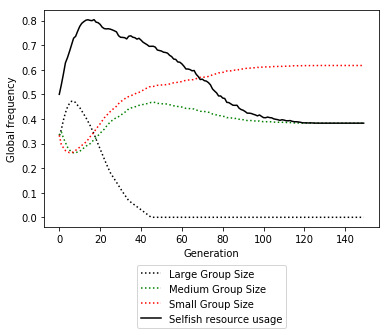

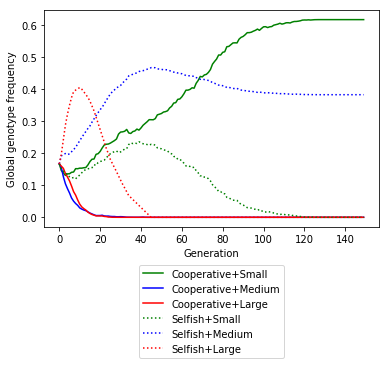

OVER!


<Figure size 432x288 with 0 Axes>

In [407]:
if "__main__" == __name__:
    InitWrite()
    pool = list()
    for i in range(Comb_num):
        pool.append( float(N / Comb_num ) )
    print (pool)
    for g in range(T):
        print("GENERATION %d" % g)
        WriteData(pool)
        smallgroups = list()
        mediumgroups = list()
        largegroups = list()
        sm = int((pool[COOP_SM] + pool[SELF_SM]) / N_small)
        md = int((pool[COOP_SM] + pool[SELF_SM]) / N_medium)
        lg = int((pool[COOP_LG] + pool[SELF_LG]) / N_large)
        if sm:
            p_sm_coop = pool[COOP_SM] / ( pool[COOP_SM] + pool[SELF_SM])
            for i in range(sm):
                group = [0.0] * Comb_num
                for i in range(N_small): 
                    if (random.random() < p_sm_coop):
                        group[COOP_SM] += 1
                    else:
                        group[SELF_SM] += 1
                smallgroups.append(group)
        if md:
            p_md_coop = pool[COOP_MD] / ( pool[COOP_MD] + pool[SELF_MD])
            for i in range(md):
                group = [0.0] * Comb_num
                for i in range(N_medium): 
                    if (random.random() < p_md_coop):
                        group[COOP_MD] += 1
                    else:
                        group[SELF_MD] += 1
                mediumgroups.append(group)
        if lg:
            p_lg_coop = pool[COOP_LG] / ( pool[COOP_LG] + pool[SELF_LG])
            for i in range(lg):
                group = [0.0] * Comb_num
                for i in range(N_large): 
                    if (random.random() < p_lg_coop):
                        group[COOP_LG] += 1
                    else:
                        group[SELF_LG] += 1
                largegroups.append(group)

        for group in largegroups:
            for _t in range(t):
                rl = Resource(group, R_large)
                Population(group, rl)


        for group in mediumgroups:
            for _t in range(t):
                rm = Resource(group, R_medium)
                Population(group, rm)
        for group in smallgroups:
            for _t in range(t):
                rs = Resource(group, R_small)
                Population(group, rs)#last value is preserved
        pool = [0.0]*Comb_num
        for group in (largegroups + mediumgroups +smallgroups):
            for i in range(Comb_num):
                pool[i] += group[i]
        print("Pool Size = %d" % sum(pool))
        scale = float(N) / float(sum(pool)) 
        print("Scale = %f" % scale)
        for i in range(Comb_num):
            pool[i] = ((pool[i] * scale))
        print("Pool Size after scale = %d" % sum(pool))
    PlotAll()
    print("OVER!")
#     input()
    pass





In [384]:
for group in largegroups:
    for _t in range(t):
        